In [1]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

os.chdir('/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Scripts/Preprocessing/')
from constants import GRIN_het_IDs, GRIN_wt_IDs

In [2]:
os.chdir('/home/melissa/RESULTS/GRIN2B/Power/WAKE/harmonics_algo/test_5/het/')
het_wake = pd.read_csv('GRIN2B_het_animals_harmonics_algo.csv')
os.chdir('/home/melissa/RESULTS/GRIN2B/Power/WAKE/harmonics_algo/test_5/wt/')
wt_wake = pd.read_csv('GRIN2B_wt_animals_harmonics_algo.csv')
wake = pd.concat([het_wake, wt_wake])

In [3]:
chan_2_wake = wake.loc[wake['Channel'] == 2]
chan_2_wake

,Unnamed: 0,Animal_ID,Channel,Power,Frequency,Genotype
626,626,131,2,5.176420e+02,0.0,GRIN2B
627,627,131,2,1.571182e+03,0.2,GRIN2B
628,628,131,2,4.428020e+02,0.4,GRIN2B
629,629,131,2,1.721686e+02,0.6,GRIN2B
630,630,131,2,1.410172e+02,0.8,GRIN2B
...,...,...,...,...,...,...
150235,150235,430,2,7.645071e-11,124.2,WT
150236,150236,430,2,7.562223e-11,124.4,WT
150237,150237,430,2,7.498110e-11,124.6,WT
150238,150238,430,2,7.452485e-11,124.8,WT


In [4]:
frequency = chan_2_wake['Frequency'].round(1)
chan_2_wake['frequency'] = frequency

/tmp/ipykernel_5125/2255353517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chan_2_wake['frequency'] = frequency


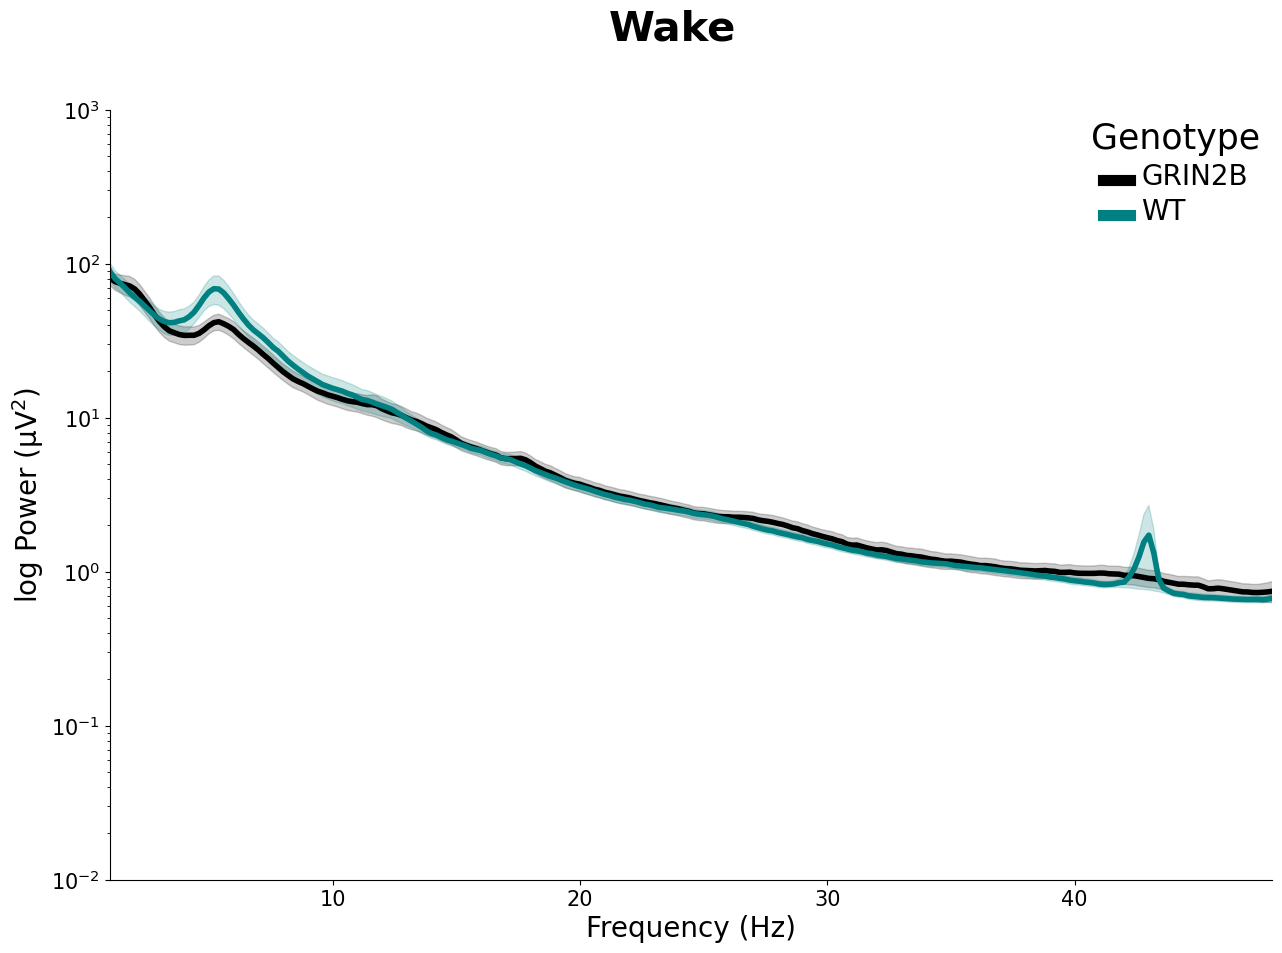

In [5]:
fig, axs = plt.subplots(1,1, figsize=(15,10), sharex = True, sharey=True)
genotype_palette = ['black', 'teal']
hue_order = ['GRIN2B', 'WT']
sns.lineplot(data= chan_2_wake, x='frequency', y='Power',hue = 'Genotype', errorbar = ("se"), 
             hue_order = hue_order, linewidth = 4, palette = genotype_palette)
sns.despine()
plt.yscale('log')
axs.set_xlim(1, 48)
axs.set_ylim(10**-2, 10**3)
axs.set_xlabel("Frequency (Hz)", fontsize = 20)
axs.set_ylabel("log Power (\u03bc$\\mathregular{V^{2}}$)", fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize = 15)

#include an overall plot title
plt.suptitle('Wake', fontsize = 30, fontweight = 'bold')

#customise the legend 
leg = plt.legend(loc = 'upper right', frameon = False)
leg.set_title('Genotype', prop = {'size': 25})
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines[0], linewidth = 8)
plt.setp(leg_lines[1], linewidth = 8)
plt.setp(leg_texts, fontsize = 20)

os.chdir('/home/melissa/RESULTS/PAPER/Power/Plots/wake/')
plt.savefig('WAKE_channel_2.svg', dpi = 300, format = 'svg')

In [6]:
#delta 1-5
delta = chan_2_wake.loc[(chan_2_wake['Frequency'] >= 1) & (chan_2_wake['Frequency'] < 5)] 
#theta 5-10
theta = chan_2_wake.loc[(chan_2_wake['Frequency'] >= 5) & (chan_2_wake['Frequency'] < 10)] 
#sigma 10-16
sigma = chan_2_wake.loc[(chan_2_wake['Frequency'] >= 10) & (chan_2_wake['Frequency'] < 16)] 
#beta 16-30
beta = chan_2_wake.loc[(chan_2_wake['Frequency'] >= 16) & (chan_2_wake['Frequency'] < 30)] 
#gamma 30-48
gamma = chan_2_wake.loc[(chan_2_wake['Frequency'] >= 30) & (chan_2_wake['Frequency'] < 48)] 

In [7]:
animal_ids = delta['Animal_ID'].unique()

In [8]:
delta_list = []
for animal in animal_ids:
    genotype = []
    if str(animal) in GRIN_het_IDs:
        genotype.append('GRIN2B')
    elif str(animal) in GRIN_wt_IDs:
        genotype.append('WT')
    animal_mean = delta.loc[delta['Animal_ID'] == animal]["Power"].mean()
    mean_dict = {'Animal_ID': [animal], 'Channel': [2], 'Genotype': genotype, 'Frequency': ['Delta'],
                'Power': [animal_mean]}
    mean_df = pd.DataFrame(data = mean_dict)
    delta_list.append(mean_df)
delta_concat = pd.concat(delta_list)

theta_list = []
for animal in animal_ids:
    genotype = []
    if str(animal) in GRIN_het_IDs:
        genotype.append('GRIN2B')
    elif str(animal) in GRIN_wt_IDs:
        genotype.append('WT')
    animal_mean = theta.loc[theta['Animal_ID'] == animal]["Power"].mean()
    mean_dict = {'Animal_ID': [animal], 'Channel': [2], 'Genotype': genotype, 'Frequency': ['Theta'],
                'Power': [animal_mean]}
    mean_df = pd.DataFrame(data = mean_dict)
    theta_list.append(mean_df)
theta_concat = pd.concat(theta_list)

sigma_list = []
for animal in animal_ids:
    genotype = []
    if str(animal) in GRIN_het_IDs:
        genotype.append('GRIN2B')
    elif str(animal) in GRIN_wt_IDs:
        genotype.append('WT')
    animal_mean = sigma.loc[sigma['Animal_ID'] == animal]["Power"].mean()
    mean_dict = {'Animal_ID': [animal], 'Channel': [2], 'Genotype': genotype, 'Frequency': ['Sigma'],
                'Power': [animal_mean]}
    mean_df = pd.DataFrame(data = mean_dict)
    sigma_list.append(mean_df)
sigma_concat = pd.concat(sigma_list)

beta_list = []
for animal in animal_ids:
    genotype = []
    if str(animal) in GRIN_het_IDs:
        genotype.append('GRIN2B')
    elif str(animal) in GRIN_wt_IDs:
        genotype.append('WT')
    animal_mean = beta.loc[beta['Animal_ID'] == animal]["Power"].mean()
    mean_dict = {'Animal_ID': [animal], 'Channel': [2], 'Genotype': genotype, 'Frequency': ['Beta'],
                'Power': [animal_mean]}
    mean_df = pd.DataFrame(data = mean_dict)
    beta_list.append(mean_df)
beta_concat = pd.concat(beta_list)

gamma_list = []
for animal in animal_ids:
    genotype = []
    if str(animal) in GRIN_het_IDs:
        genotype.append('GRIN2B')
    elif str(animal) in GRIN_wt_IDs:
        genotype.append('WT')
    animal_mean = gamma.loc[gamma['Animal_ID'] == animal]["Power"].mean()
    mean_dict = {'Animal_ID': [animal], 'Channel': [2], 'Genotype': genotype, 'Frequency': ['Gamma'],
                'Power': [animal_mean]}
    mean_df = pd.DataFrame(data = mean_dict)
    gamma_list.append(mean_df)
gamma_concat = pd.concat(gamma_list)

In [10]:
gamma_concat

,Animal_ID,Channel,Genotype,Frequency,Power
0,131,2,GRIN2B,Gamma,1.185640
0,130,2,GRIN2B,Gamma,1.769068
0,129,2,GRIN2B,Gamma,0.602478
0,228,2,GRIN2B,Gamma,0.590917
0,227,2,GRIN2B,Gamma,0.730011
0,229,2,GRIN2B,Gamma,0.942617
0,373,2,GRIN2B,Gamma,0.669671
0,138,2,GRIN2B,Gamma,1.515274
0,137,2,GRIN2B,Gamma,1.391653
0,139,2,GRIN2B,Gamma,2.833292


In [11]:
os.chdir('/home/melissa/RESULTS/PAPER/Power/StatisticsDatasets/')
delta_concat.to_csv('delta_wake.csv')
theta_concat.to_csv('theta_wake.csv')
sigma_concat.to_csv('sigma_wake.csv')
beta_concat.to_csv('beta_wake.csv')
gamma_concat.to_csv('gamma_wake.csv')

In [9]:
def bar_and_strip_plots(delta, theta, sigma, beta, gamma, sleepstage):
        f, ax = plt.subplots(1,5, figsize=(10,10), sharey = True)
        sns.set_style("white")
        hue_order_palette = ['WT', 'GRIN2B']
        palette_stats = ['black', 'teal']
        pointplot_palette = ['white', 'white']
        sns.barplot(x= 'Frequency', y='Power', hue='Genotype',errorbar = ("se"), data = delta, width = 1.0,
                    hue_order = hue_order_palette, palette = palette_stats, ax = ax[0])
        delta_mean = pd.DataFrame(delta_concat.groupby(['Animal_ID', 'Genotype', 'Frequency'])['Power'].mean().reset_index())
        sns.stripplot(x = 'Frequency', y = 'Power', hue = 'Genotype', data = delta_mean, hue_order = hue_order_palette,
                      palette = pointplot_palette, edgecolor = 'k', sizes = (50, 50), dodge = True, linewidth = 1, ax = ax[0])
        ax[0].legend([],[], frameon=False)
        ax[0].set_yscale('log')
        ax[0].set(xlabel=None)
        ax[0].set(xticklabels=['Delta'])
        ax[0].set_ylabel("log Power (\u03bc$\\mathregular{V^{2}}$)")
        sns.barplot(x= 'Frequency', y='Power', hue='Genotype', errorbar = ("se"), data = theta, width = 1.0,
                    hue_order = hue_order_palette, palette = palette_stats, ax = ax[1])
        theta_mean = pd.DataFrame(theta_concat.groupby(['Animal_ID', 'Genotype', 'Frequency'])['Power'].mean().reset_index())
        sns.stripplot(x = 'Frequency', y = 'Power', hue = 'Genotype', data = theta_mean, hue_order = hue_order_palette,
                      palette = pointplot_palette, edgecolor = 'k', sizes = (50, 50), dodge = True, linewidth = 1, ax = ax[1])
        ax[1].legend([],[], frameon=False)
        ax[1].set_yscale('log')
        ax[1].set(xlabel=None)
        ax[1].set(xticklabels=['Theta'])
        plt.yticks(color='w')
        ax[1].set(ylabel=None)
        sns.barplot(x= 'Frequency', y='Power', hue='Genotype', errorbar = ("se"), data = sigma, width = 1.0,
                    hue_order = hue_order_palette, palette = palette_stats, ax = ax[2])
        sigma_mean = pd.DataFrame(sigma_concat.groupby(['Animal_ID', 'Genotype', 'Frequency'])['Power'].mean().reset_index())
        sns.stripplot(x = 'Frequency', y = 'Power', hue = 'Genotype', data = sigma_mean, hue_order = hue_order_palette,
                      palette = pointplot_palette, edgecolor = 'k', sizes = (50, 50), dodge = True, linewidth = 1, ax = ax[2])
        ax[2].legend([],[], frameon=False)
        ax[2].set_yscale('log')
        ax[2].set(ylabel=None)
        ax[2].set(xlabel= 'Channel 2')
        ax[2].set(xticklabels=['Sigma'])
        plt.yticks(color='w')
        sns.barplot(x= 'Frequency', y='Power', hue='Genotype', errorbar = ("se"), data = beta, width = 1.0,
                    hue_order = hue_order_palette, palette = palette_stats, ax = ax[3])
        beta_mean = pd.DataFrame(beta_concat.groupby(['Animal_ID', 'Genotype', 'Frequency'])['Power'].mean().reset_index())
        sns.stripplot(x = 'Frequency', y = 'Power', hue = 'Genotype', data = beta_mean, hue_order = hue_order_palette,
                      palette = pointplot_palette, edgecolor = 'k', sizes = (50, 50), dodge = True, linewidth = 1, ax = ax[3])
        ax[3].legend([],[], frameon=False)
        ax[3].set_yscale('log')
        ax[3].set(xlabel=None)
        ax[3].set(xticklabels=['Beta'])
        plt.yticks(color='w')
        ax[3].set(ylabel=None)
        sns.barplot(x= 'Frequency', y='Power', hue='Genotype', errorbar = ("se"), data = gamma, width = 1.0,
                            hue_order = hue_order_palette, palette = palette_stats, ax = ax[4])
        gamma_mean = pd.DataFrame(gamma_concat.groupby(['Animal_ID', 'Genotype', 'Frequency'])['Power'].mean().reset_index())
        sns.stripplot(x = 'Frequency', y = 'Power', hue = 'Genotype', data = gamma_mean, hue_order = hue_order_palette,
                      palette = pointplot_palette, edgecolor = 'k', sizes = (50, 50), dodge = True, linewidth = 1, ax = ax[4])
        ax[4].legend([], [], frameon = False)
        ax[4].set_yscale('log')
        ax[4].set(xlabel=None)
        ax[4].set(xticklabels=['Gamma'])
        plt.yticks(color='w')
        ax[4].set(ylabel=None)


        #sns.despine()
        plt.yscale('log')
        plt.suptitle(sleepstage, fontsize = 30, fontweight = 'bold')
    

        ax[0].spines['top'].set_visible(False)
        ax[0].spines['right'].set_visible(False)
        ax[0].spines['bottom'].set_visible(False)
        ax[0].spines['left'].set_visible(False)
        ax[1].spines['top'].set_visible(False)
        ax[1].spines['right'].set_visible(False)
        ax[1].spines['bottom'].set_visible(False)
        ax[1].spines['left'].set_visible(False)
        ax[2].spines['top'].set_visible(False)
        ax[2].spines['right'].set_visible(False)
        ax[2].spines['bottom'].set_visible(False)
        ax[2].spines['left'].set_visible(False)
        ax[3].spines['top'].set_visible(False)
        ax[3].spines['right'].set_visible(False)
        ax[3].spines['bottom'].set_visible(False)
        ax[3].spines['left'].set_visible(False)
        ax[4].spines['top'].set_visible(False)
        ax[4].spines['right'].set_visible(False)
        ax[4].spines['bottom'].set_visible(False)
        ax[4].spines['left'].set_visible(False)



        #Legend
        custom_lines = [Line2D([0], [0], color = 'black', lw = 6),
                        Line2D([0], [0], color = 'teal', lw = 6)]
        labels = ['WT', 'GRIN2B']
        ax[4].legend(custom_lines, labels, frameon = False)
        return f

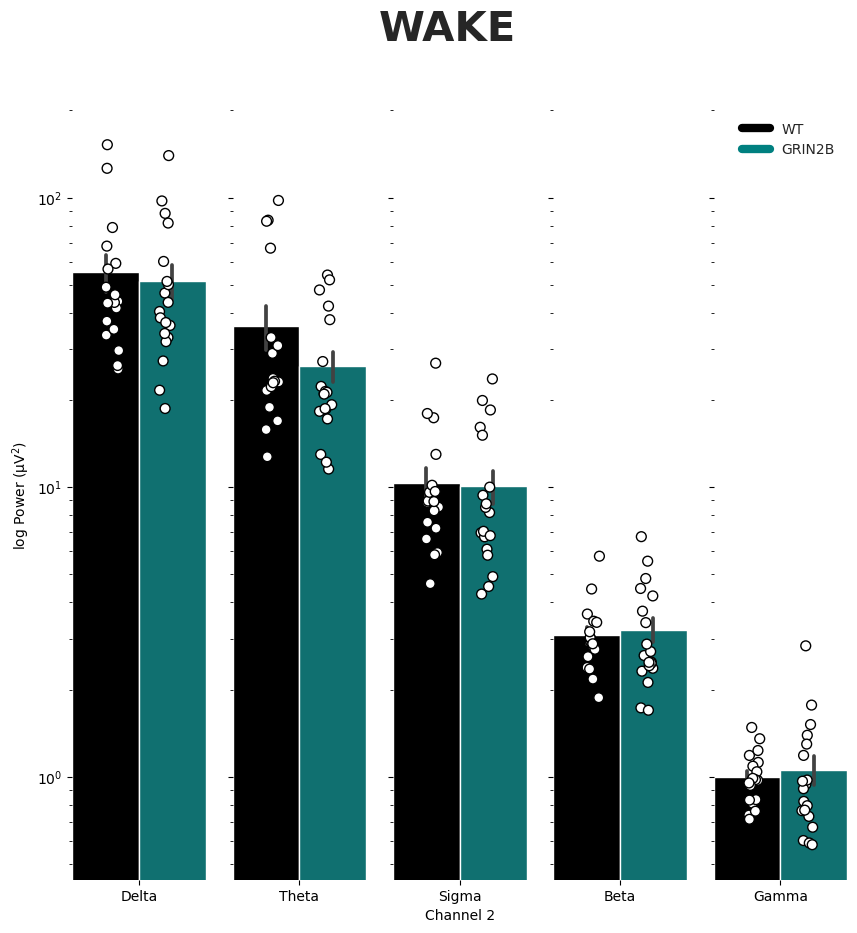

In [10]:
wake_fig = bar_and_strip_plots(delta_concat, theta_concat, sigma_concat, beta_concat, gamma_concat, sleepstage = 'WAKE')
os.chdir('/home/melissa/RESULTS/PAPER/Power/Plots/wake/')
plt.savefig('wake_barplot_frequencys.svg', dpi = 300, format = 'svg')